In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [6]:
data = pd.get_dummies(data, drop_first = True)

In [7]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [8]:
y = data['charges']
data.drop(columns = 'charges', inplace = True)

In [9]:
X = data

In [10]:
X.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1070, 8)
(268, 8)
(1070,)
(268,)


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.coef_

array([  256.80082736,   335.31162586,   407.88146089,   421.59933721,
       23516.3609712 ,  -974.18490794, -1133.31762646,  -958.32298232])

In [16]:
model.intercept_

-11871.291681531695

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [19]:
print(score)

0.7353925966337067


In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv =55)
print(scores.mean())

0.6980335384569044


**Polynomial Regression**

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def poly(degree = 2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [22]:
poly_model = poly()
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [23]:
y_pred = poly_model.predict(X_test)

In [24]:
score = r2_score(y_test, y_pred)
print(score)

0.8178659666536902


In [25]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 10)
train_score, val_score = validation_curve(poly(), X, y,'polynomialfeatures__degree', degree, cv=5)

In [26]:
train_scores = []
test_score = []
degree = np.arange(1, 4)
for i in degree:
    poly_model = poly(i)
    poly_model.fit(X_train, y_train)
    score = cross_val_score(poly_model, X_train, y_train, scoring="r2", cv=5)
    train_scores.append(score.mean())
    
    y_pred = poly_model.predict(X_test)
    score = r2_score(y_test, y_pred)
    test_score.append(score)

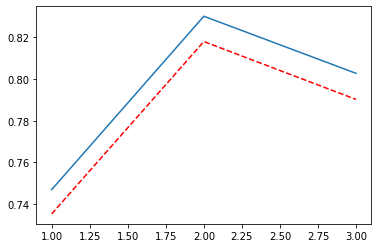

In [27]:
plt.plot(degree, train_scores)
plt.plot(degree, test_score, '--r')